In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")

In [3]:
texts_reduced=texts_df[['filename','title','volume','issue','author','language','date','journal_title']]

In [4]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20303 entries, 0 to 20302
Data columns (total 8 columns):
filename         20303 non-null object
title            20267 non-null object
volume           20303 non-null object
issue            20303 non-null object
author           20303 non-null object
language         20303 non-null object
date             20303 non-null object
journal_title    20303 non-null object
dtypes: object(8)
memory usage: 1.2+ MB


In [5]:
texts_reduced=texts_reduced.drop_duplicates()

In [6]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3726 entries, 0 to 20296
Data columns (total 8 columns):
filename         3726 non-null object
title            3720 non-null object
volume           3726 non-null object
issue            3726 non-null object
author           3726 non-null object
language         3726 non-null object
date             3726 non-null object
journal_title    3726 non-null object
dtypes: object(8)
memory usage: 262.0+ KB


In [7]:
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

In [8]:
texts_reduced.head()

filename           title volume issue  \
0   mws.6497.xml         N°. XV.      1   015   
7   mws.6948.xml     Chapitre I.      3   001   
17  mws.2983.xml  XXVI. Discours      1   027   
23   mws.372.xml     Discurso XI      1    11   
27  mws.7053.xml    Lezione CCXX      4   220   

                                               author            language  \
0   Anonym [Jean Rousset de Missy / Nicolas de Gue...              French   
7                            Jean-François de Bastide              French   
17                                   Justus Van Effen              French   
23               Anónimo (Francisco del Valle-Inclán)  Spanish; Castilian   
27                                    Cesare Frasponi             Italian   

                                    date  \
0   1715\n                        [1714]   
7                              1760-1761   
17                             1711-1712   
23                                  1800   
27                                  1728   

                                    journal_title  \
0   Le Censeur ou Caractères des Mœurs de la Haye   
7                                        Le Monde   
17                                  Le Misantrope   
23                          El Catón Compostelano   
27                          Il Filosofo alla Moda   

                                    topics  
0                    {Manners and Customs}  
7                {Autopoetical Reflection}  
17  {Idea of Man, Theatre Literature Arts}  
23         {Manners and Customs, Politics}  
27                           {Idea of Man}

In [9]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1

In [10]:
for topic in topics_count.index:
    texts_reduced[topic]=0

In [13]:
for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

In [15]:
texts_corrected=texts_reduced
texts_corrected.loc[texts_corrected.date=='1715\n                        [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1760-1761','date']=1760
texts_corrected.loc[texts_corrected.date=='1762-1763','date']=1762
texts_corrected.loc[texts_corrected.date=='1763-1763','date']=1763
texts_corrected.loc[texts_corrected.date=='1711-1712','date']=1711
texts_corrected.loc[texts_corrected.date=='1723-1725','date']=1723
texts_corrected.loc[texts_corrected.date=='1735-1736','date']=1735
texts_corrected.loc[texts_corrected.date=='1779-1780','date']=1779
texts_corrected.loc[texts_corrected.date=='1786-1788','date']=1786
texts_corrected.loc[texts_corrected.date=='1795-1796','date']=1795
texts_corrected.loc[texts_corrected.date=='1803-1804','date']=1803
texts_corrected.loc[texts_corrected.date=='1787\n                    bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1750\n                        [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724\n                        [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1750 [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724 [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1787 bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1715 [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1751 [1749-1751]','date']=1751
texts_corrected.loc[texts_corrected.date=='1751\n                        [1749-1751]','date']=1751

texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='missing'].index)
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='4-192'].index)

texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.journal_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.journal_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected.loc[texts_corrected.journal_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.journal_title=='missing'].index)

In [52]:
journal_count=texts_corrected.groupby('journal_title')['issue'].count().sort_values(ascending=False)

In [16]:
from datetime import datetime
for row in range(len(texts_corrected)):
    try:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y').year
    except ValueError:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y-%m-%d').year

In [55]:
topics_count.sort_values()

Austria                       1
Apologetic of Spain           2
Friendship                    3
Switzerland                   4
America (West India)          8
Germany                      19
Foreign Societies            37
Italy                        45
Spain                        47
Superstition                 52
Critics on Nobility          72
Nature                       83
England                      87
Other Countries              87
Charity                      94
France                       95
Economy                     109
Passion                     110
Law                         129
Family                      131
Culture of Conversation     132
Science                     132
Politics                    150
Happiness                   167
Structure of Society        173
Reason                      175
Fashion                     181
Image of Men                199
Philosophy                  244
Education and Formation     276
Religion                    304
Morale  

In [56]:
relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion']
#relevant_topics=['Theatre Literature Arts']
relevant_topics=['Image of Men','Nature','Science','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion','Passion','Fashion']

texts_changes=texts_corrected[['date','language','journal_title','issue','volume']+relevant_topics]

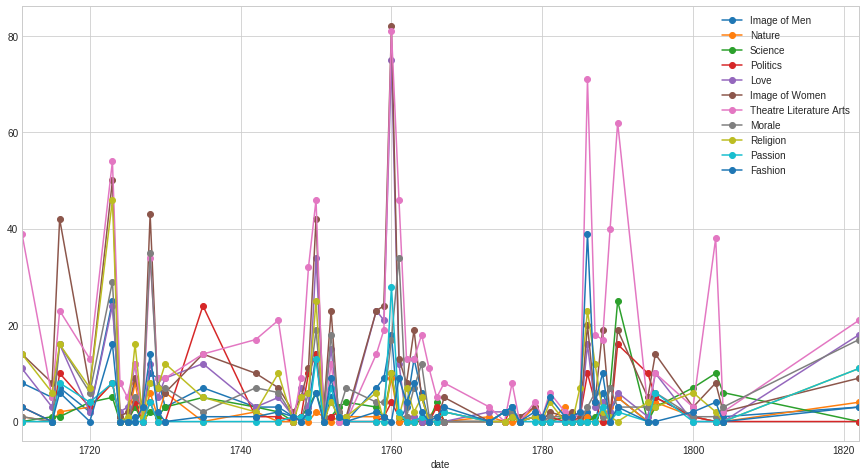

In [57]:
topics_year=texts_changes.groupby('date').sum()
topics_year.plot(figsize=(15,8),marker='o')

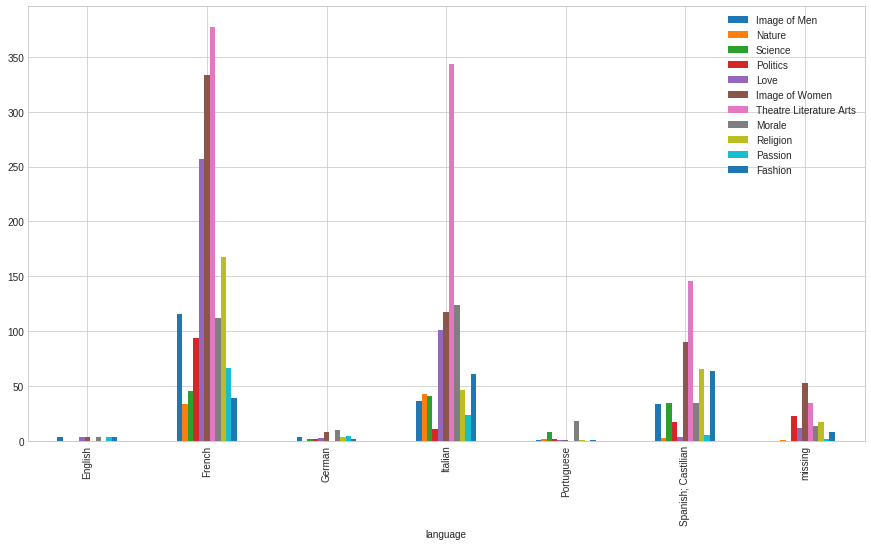

In [58]:
topics_language=texts_changes.groupby('language').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);

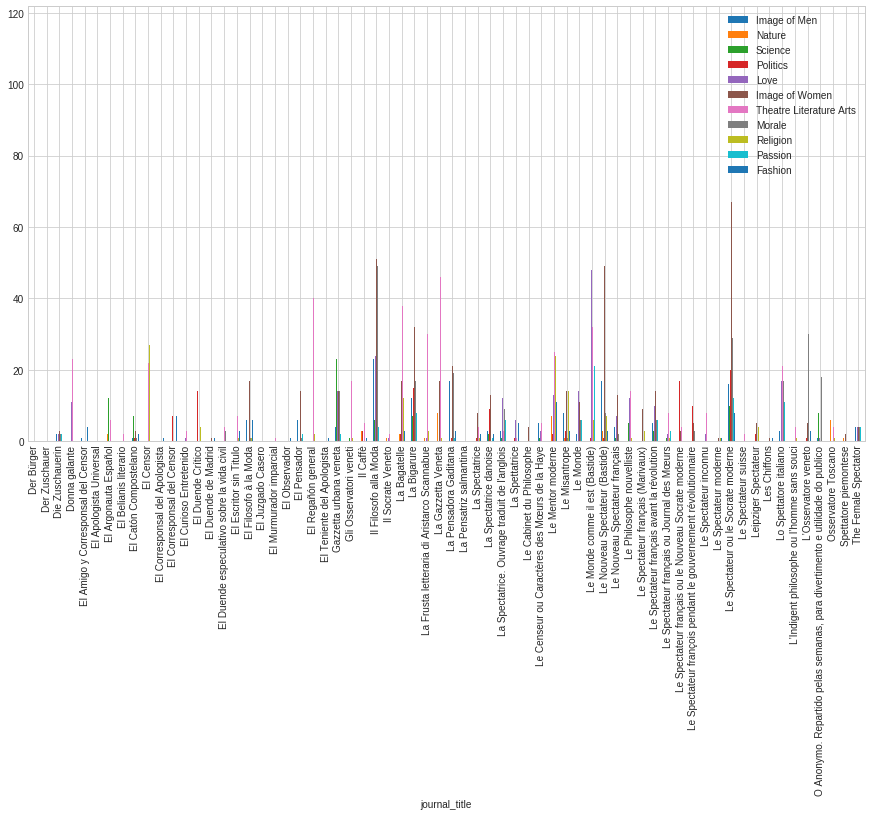

In [59]:
topics_language=texts_changes.groupby('journal_title').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);

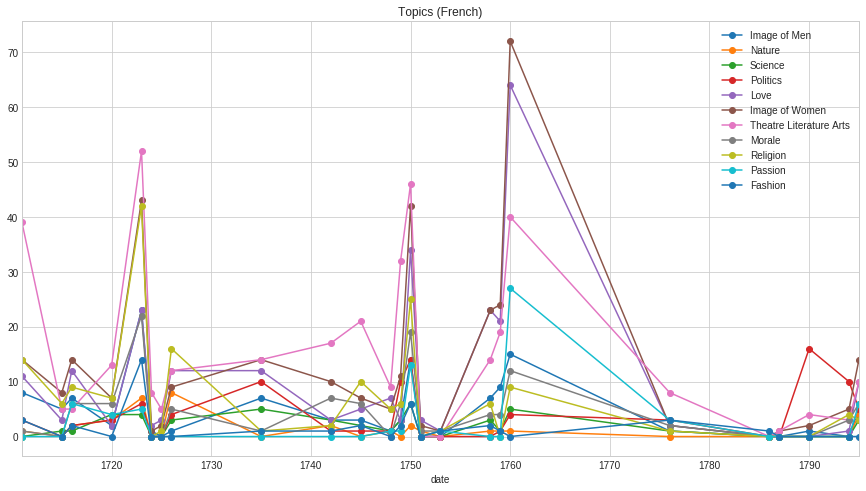

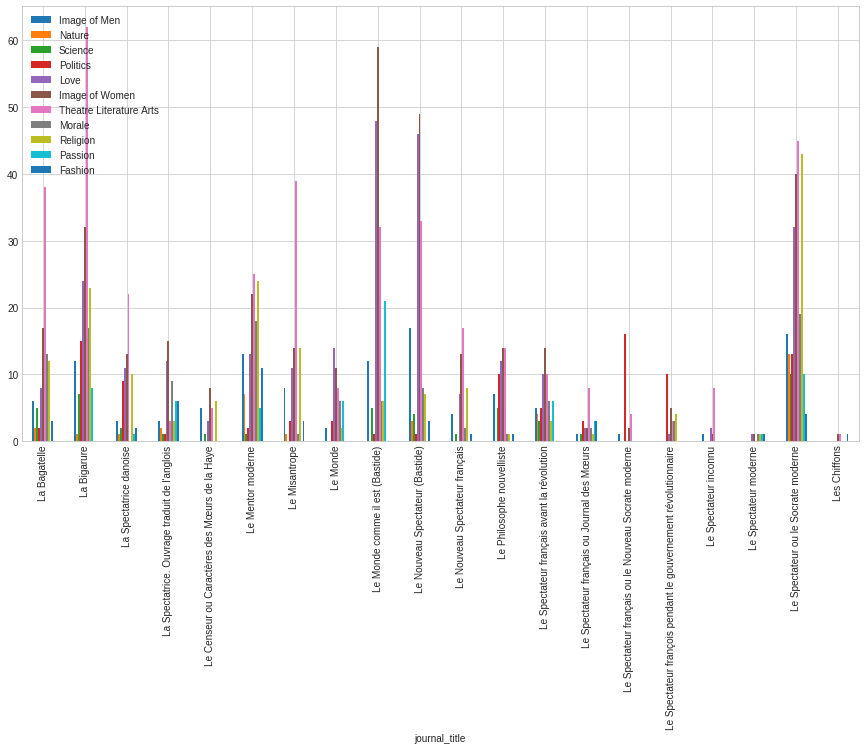

In [60]:
topics_year_language=texts_changes.loc[texts_corrected.language=='French'].groupby('date').sum()
ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics (French)')

topics_language=texts_changes.loc[texts_changes.language=='French'].groupby('journal_title').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);

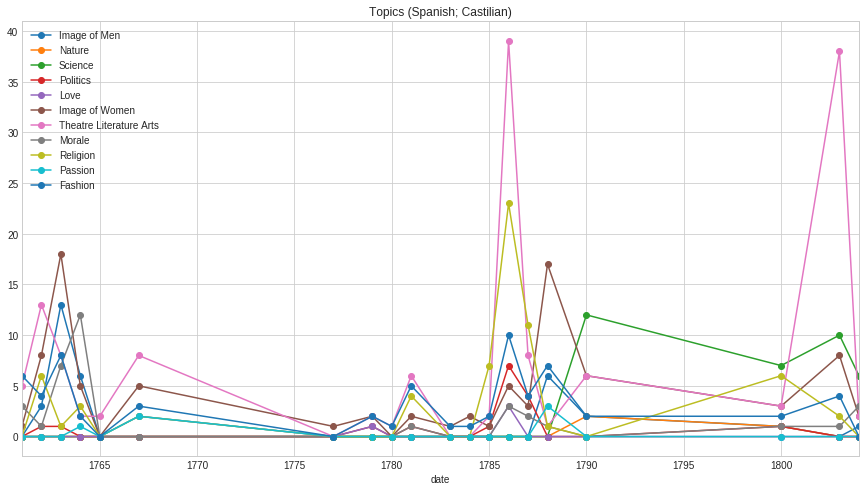

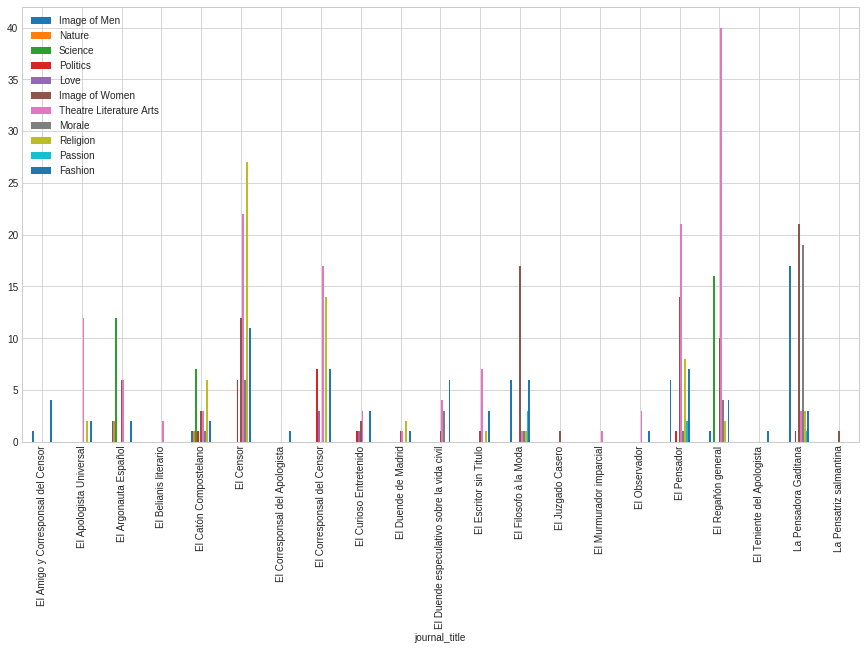

In [61]:
topics_year_language=texts_changes.loc[texts_corrected.language=='Spanish; Castilian'].groupby('date').sum()
ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics (Spanish; Castilian)')

topics_language=texts_changes.loc[texts_changes.language=='Spanish; Castilian'].groupby('journal_title').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);

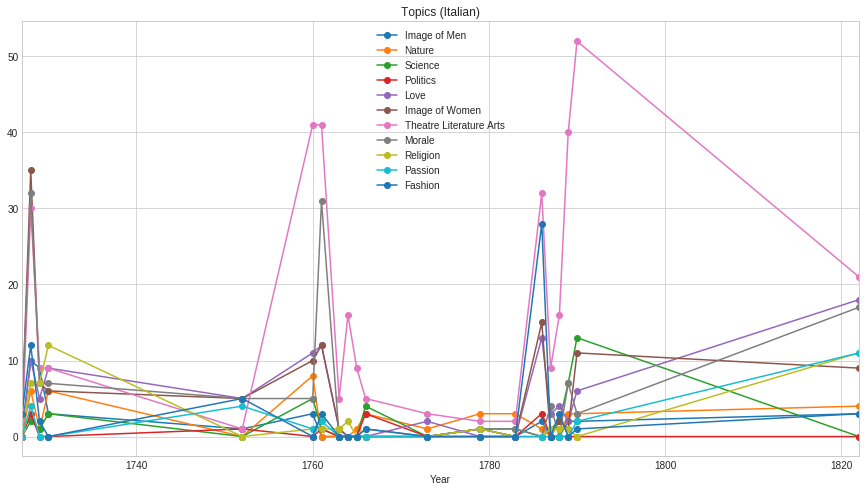

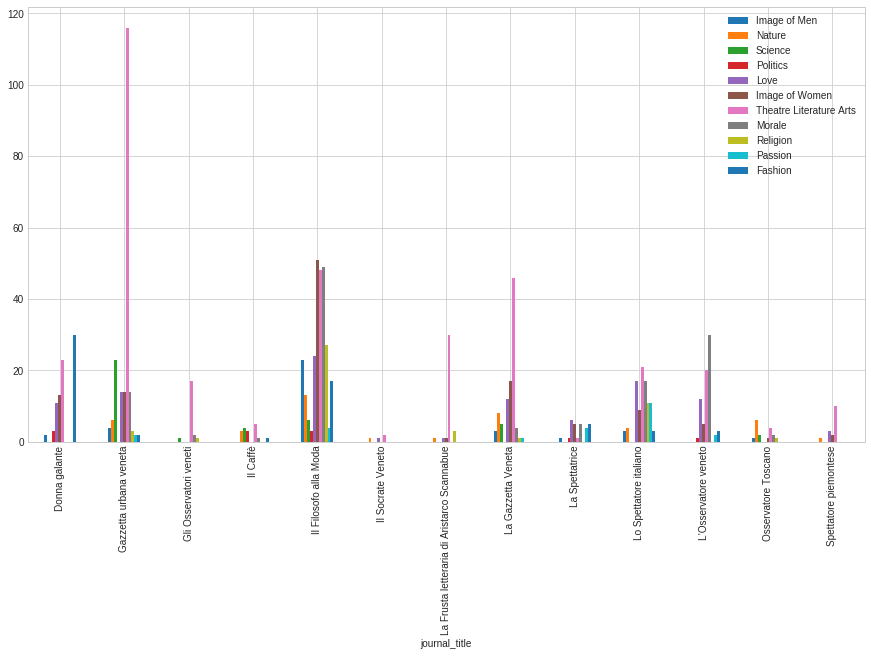

In [62]:
topics_year_language=texts_changes.loc[texts_corrected.language=='Italian'].groupby('date').sum()
ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics (Italian)')
ax.set_xlabel('Year')

topics_language=texts_changes.loc[texts_changes.language=='Italian'].groupby('journal_title').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),kind='bar')
ax.set_xticklabels(topics_language.index, rotation=90);

/home/bgeiger/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


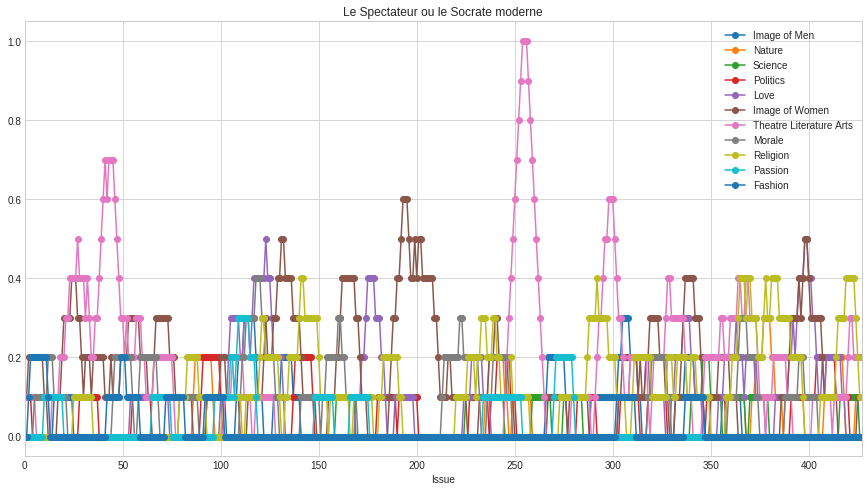

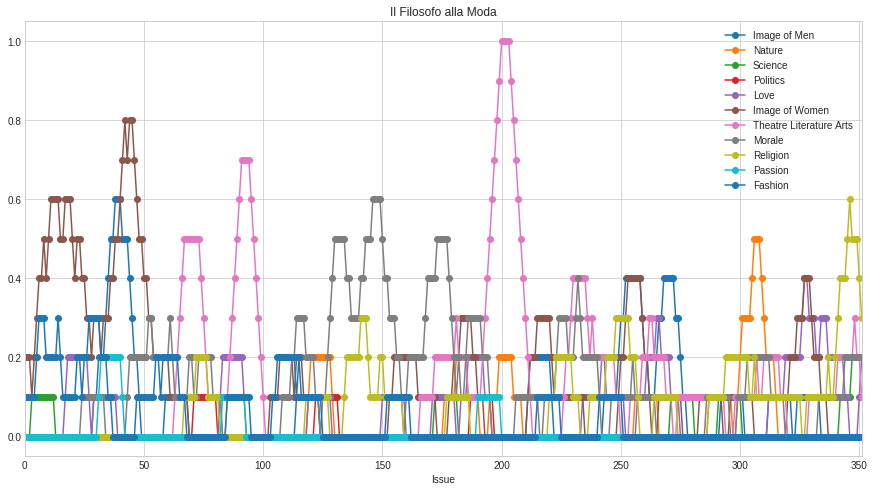

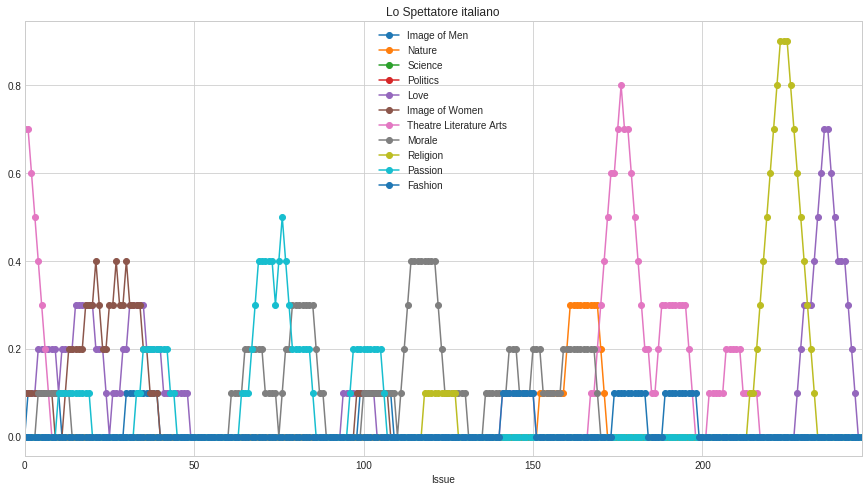

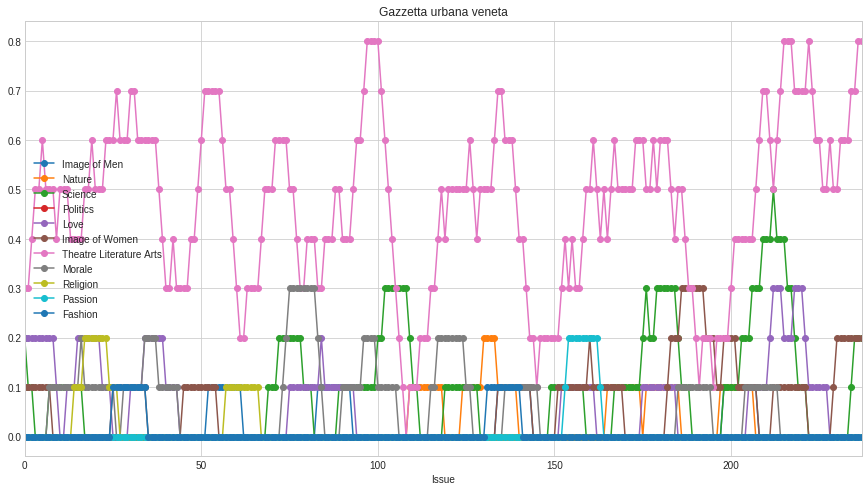

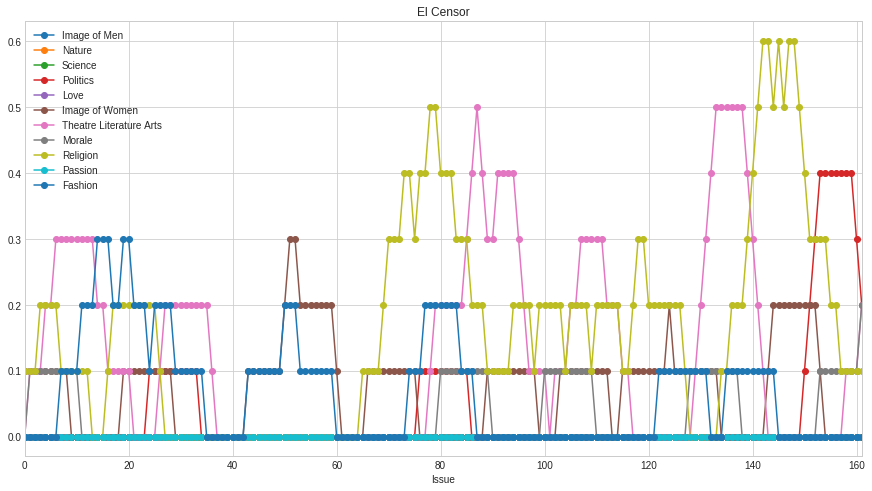

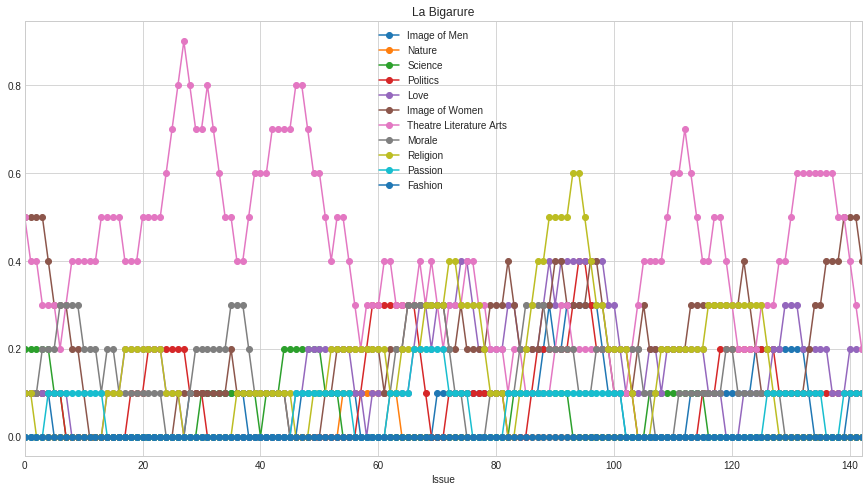

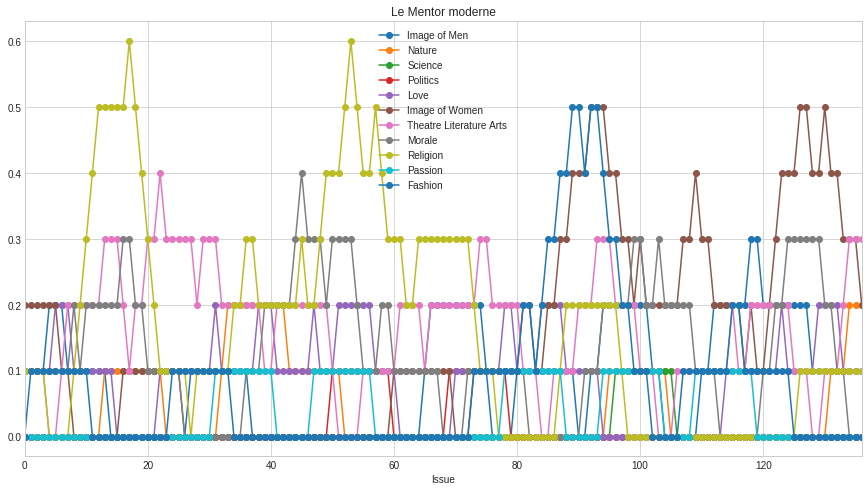

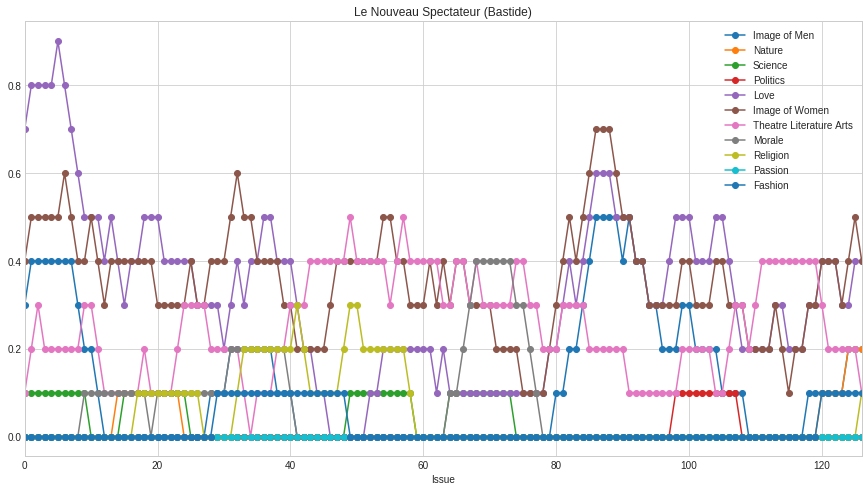

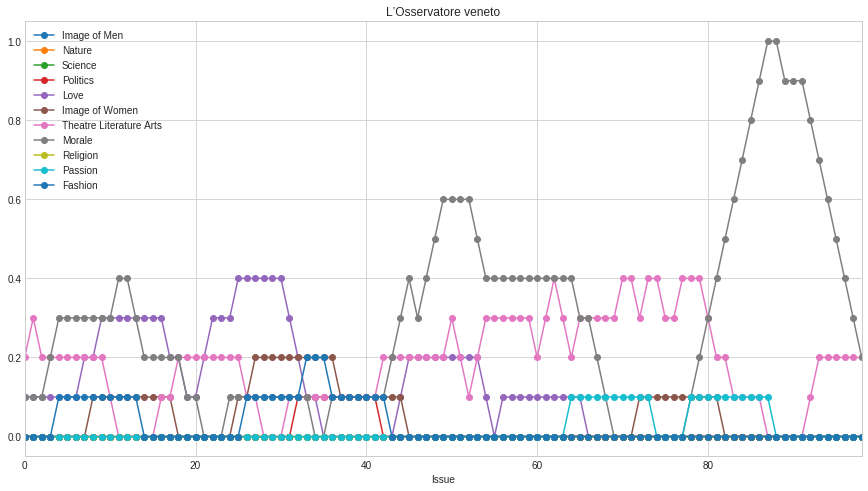

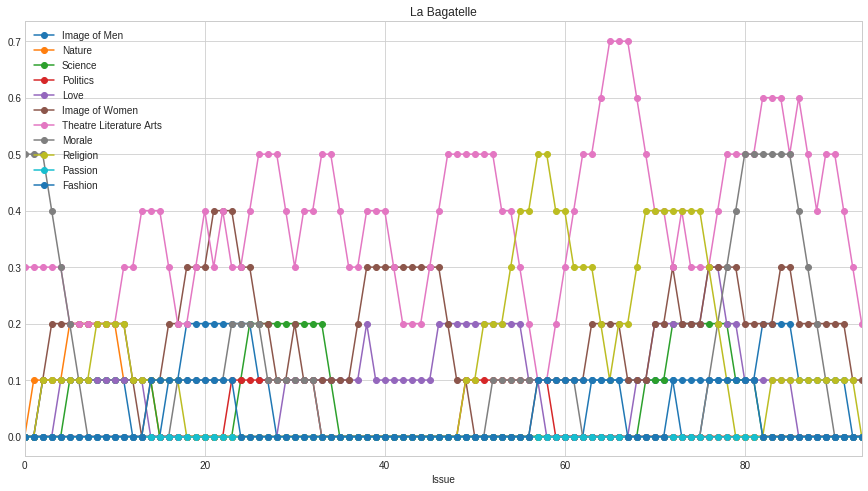

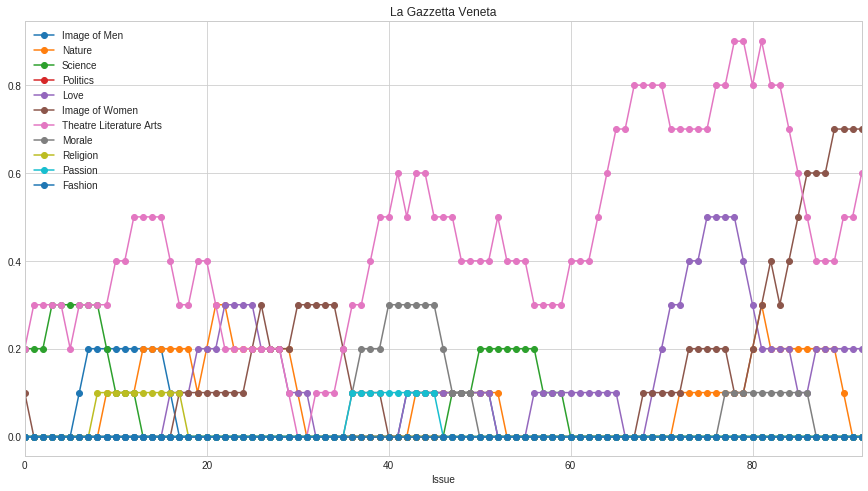

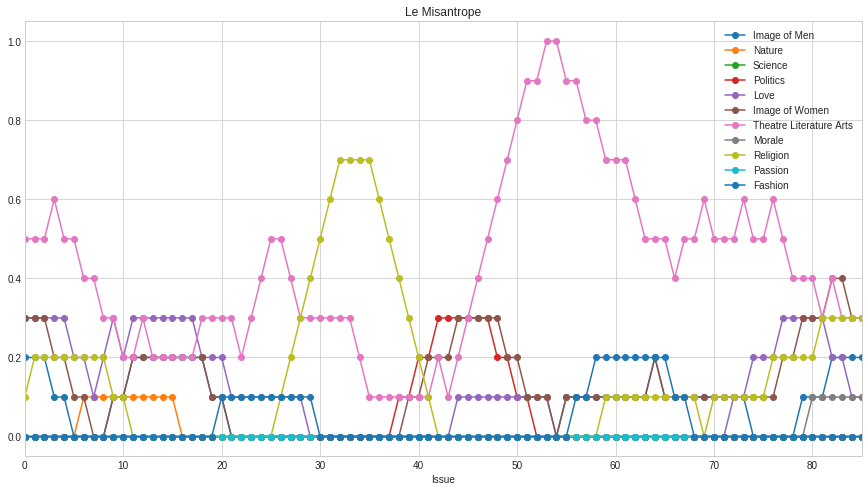

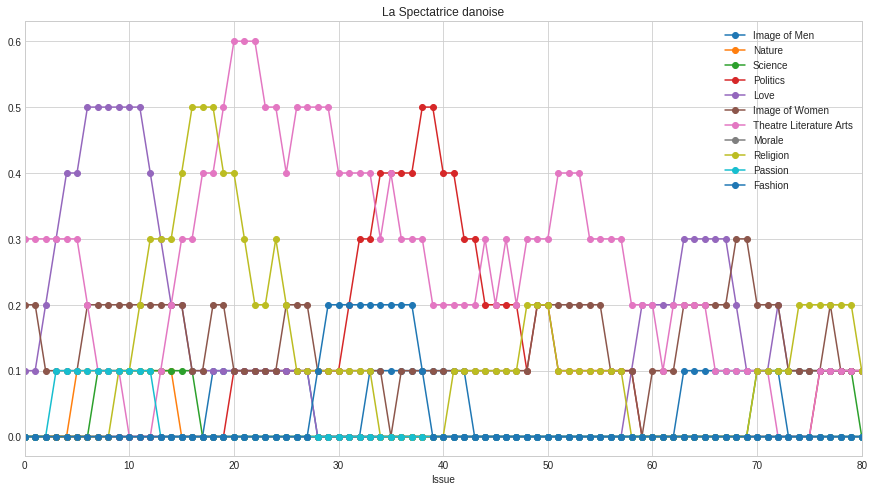

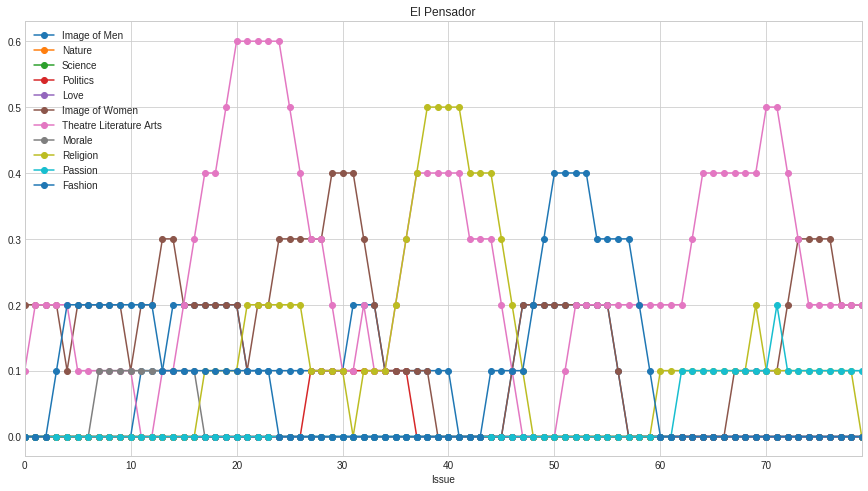

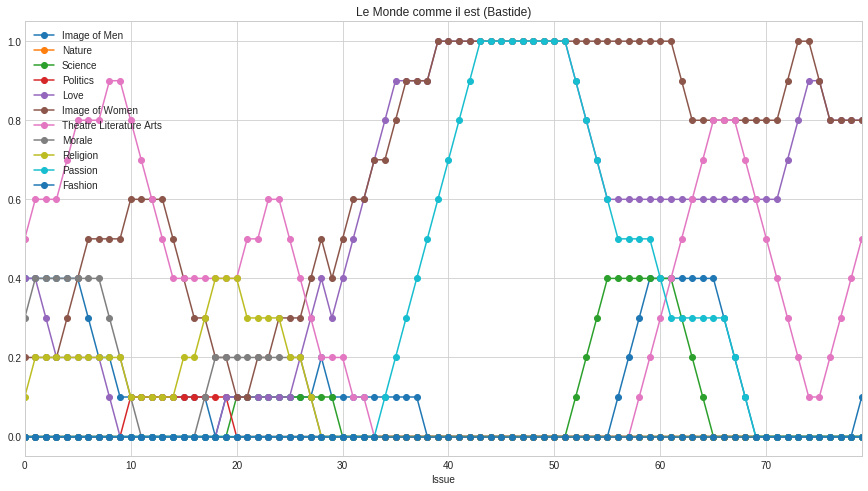

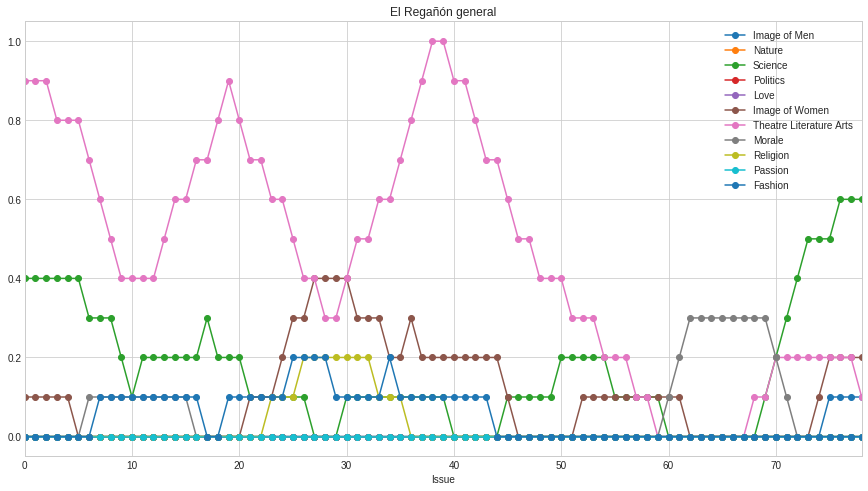

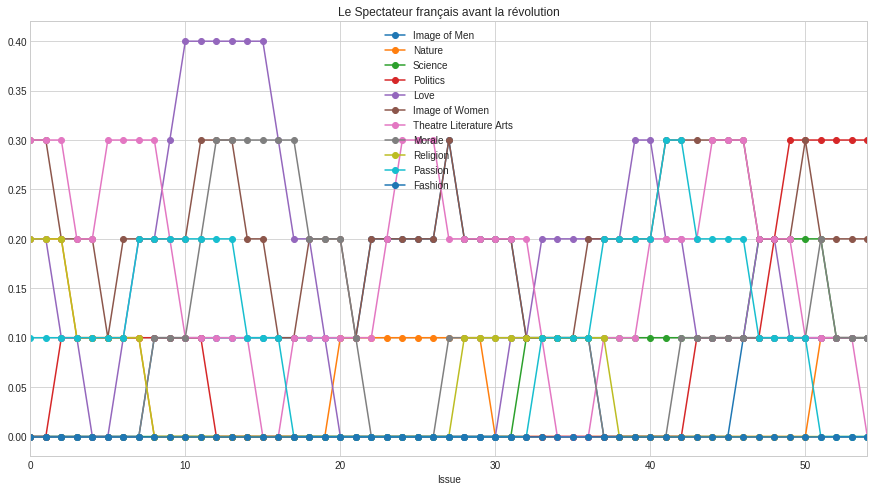

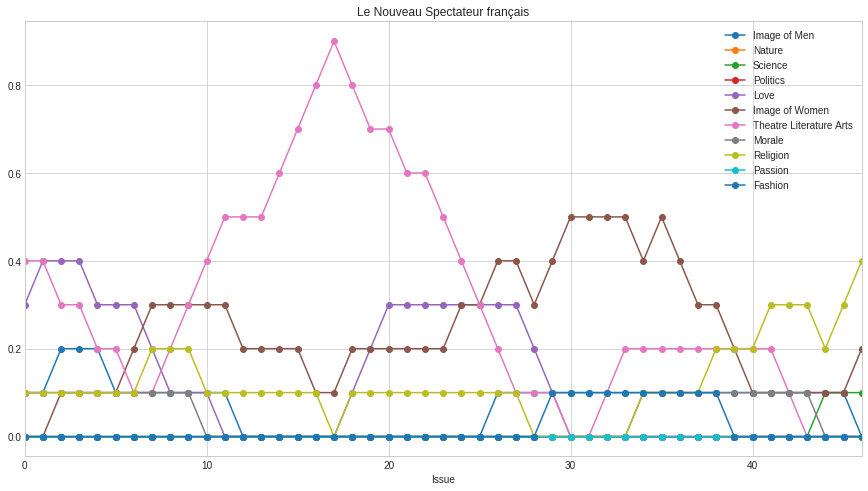

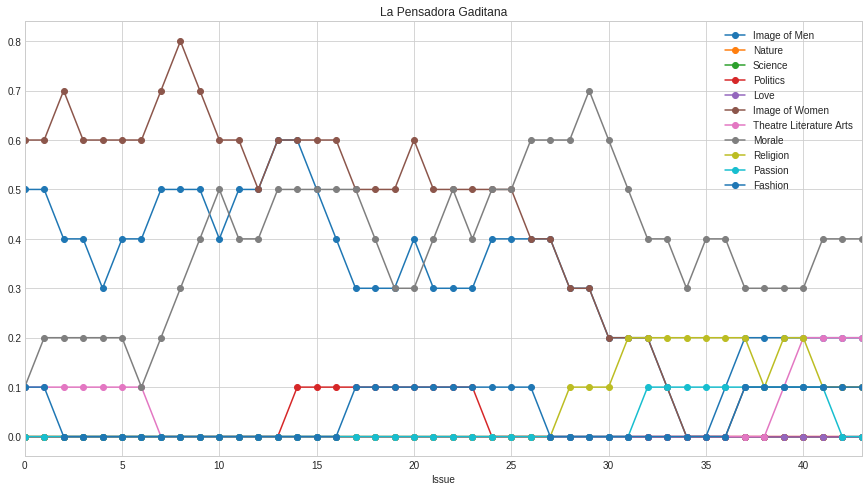

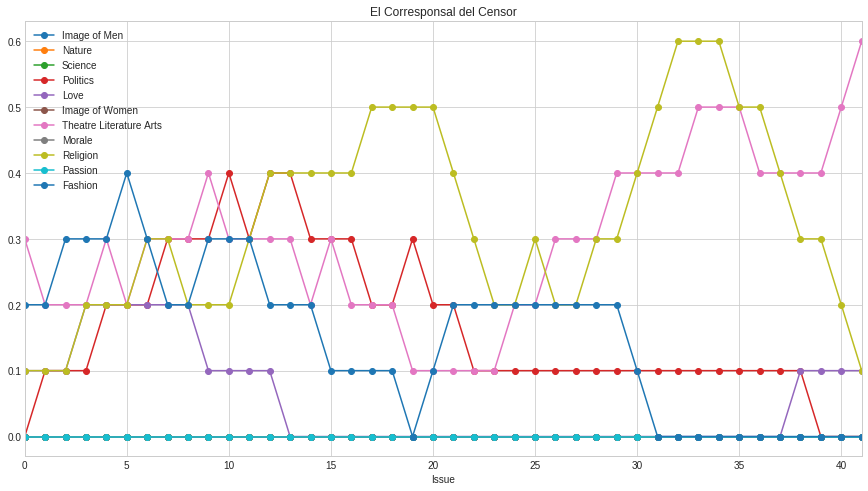

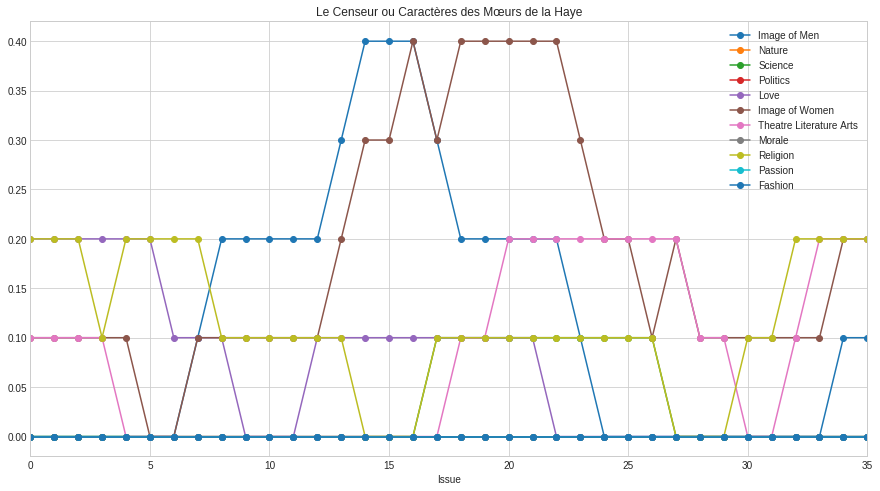

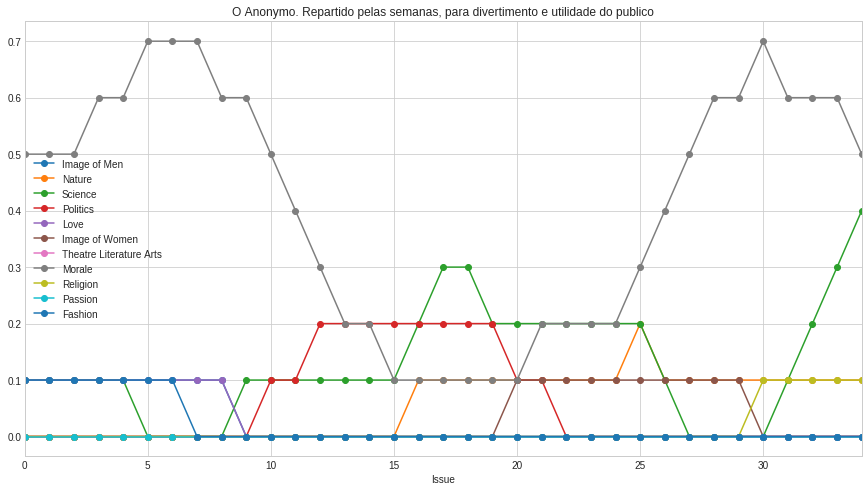

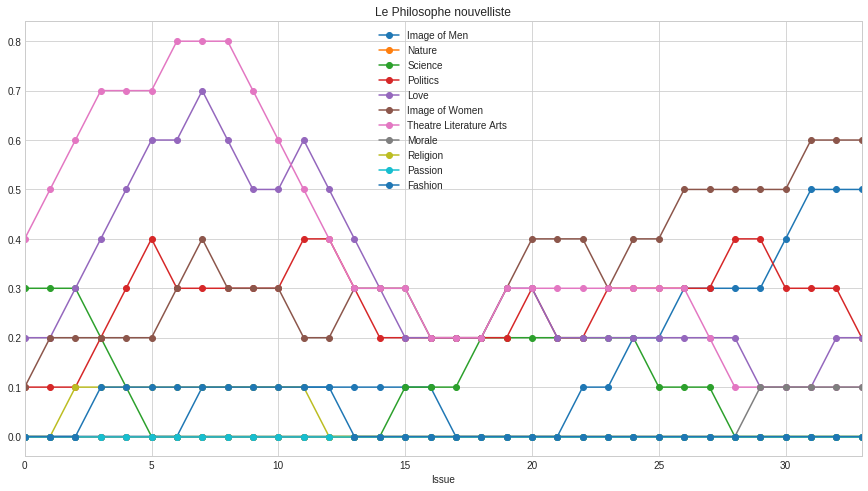

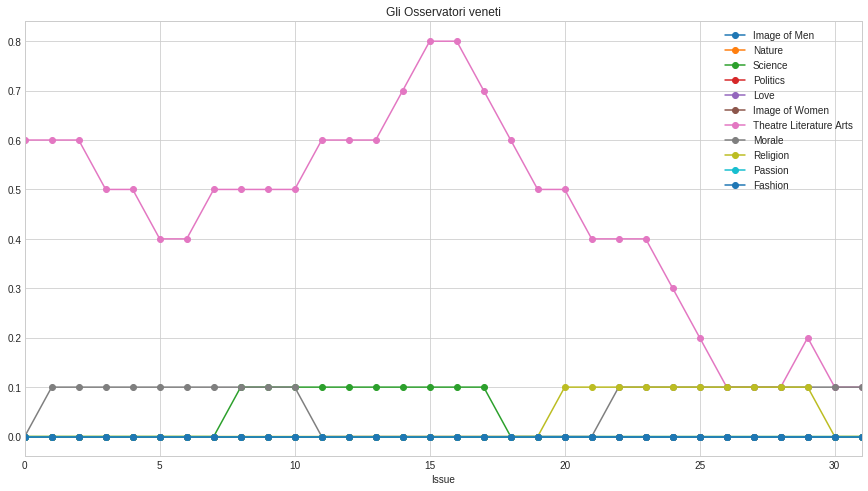

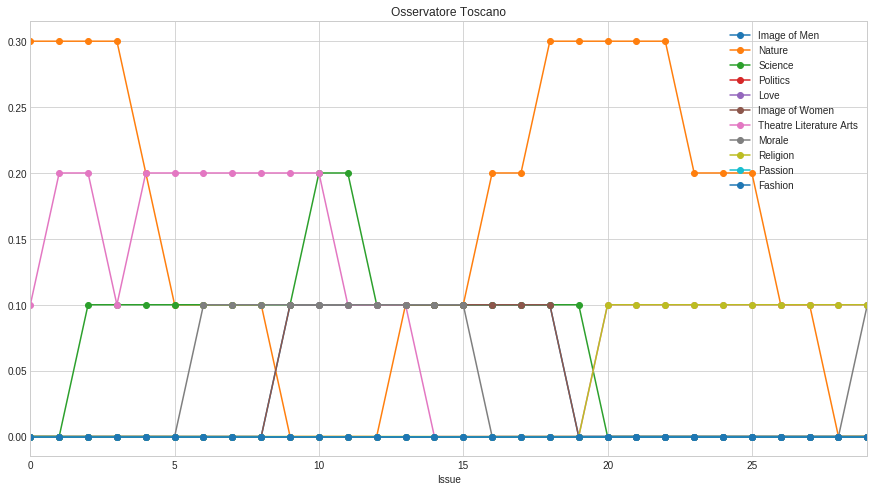

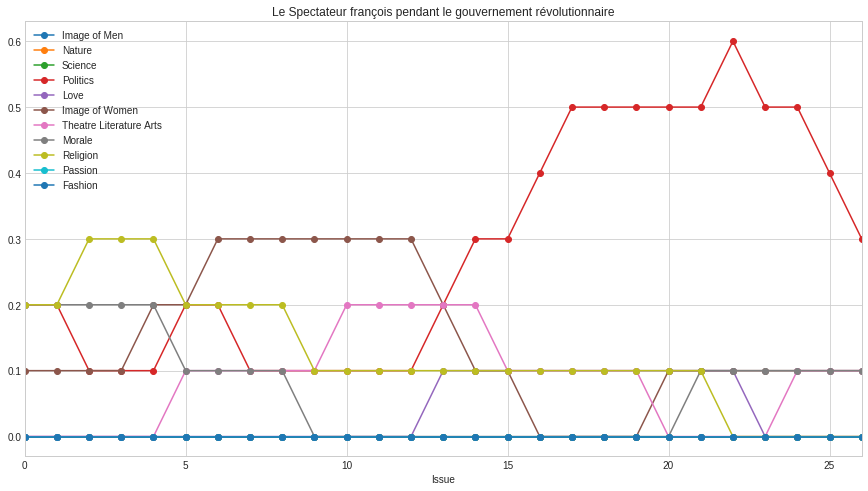

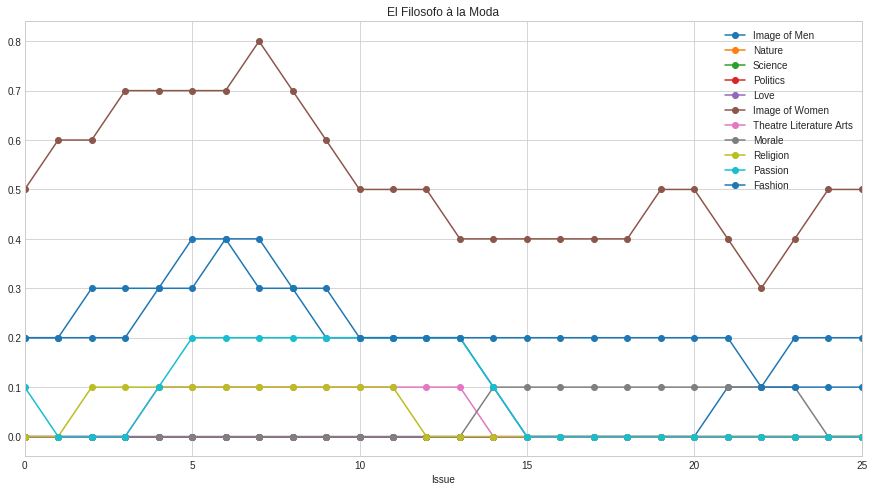

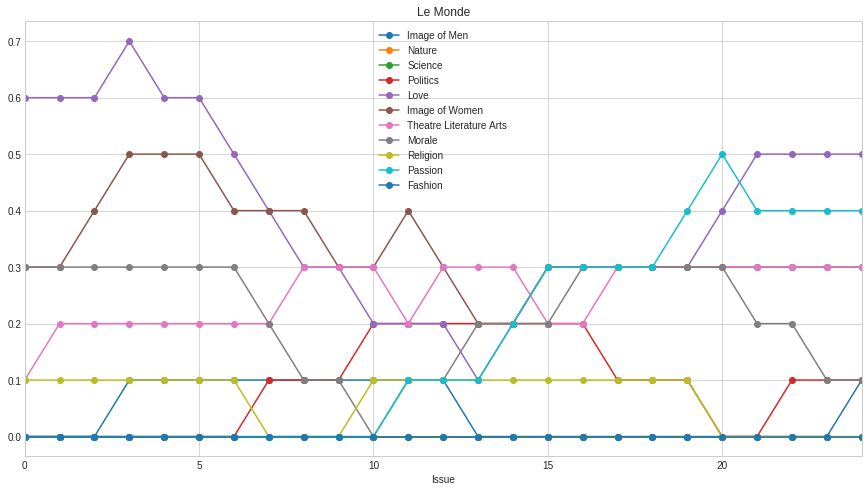

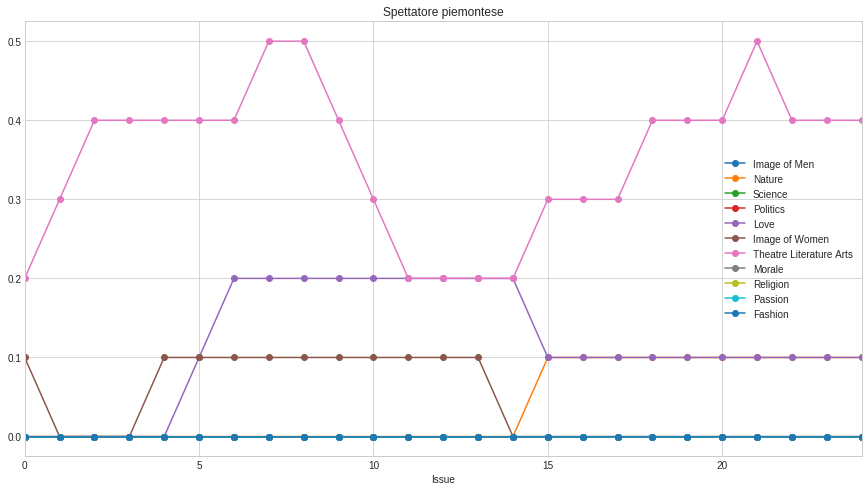

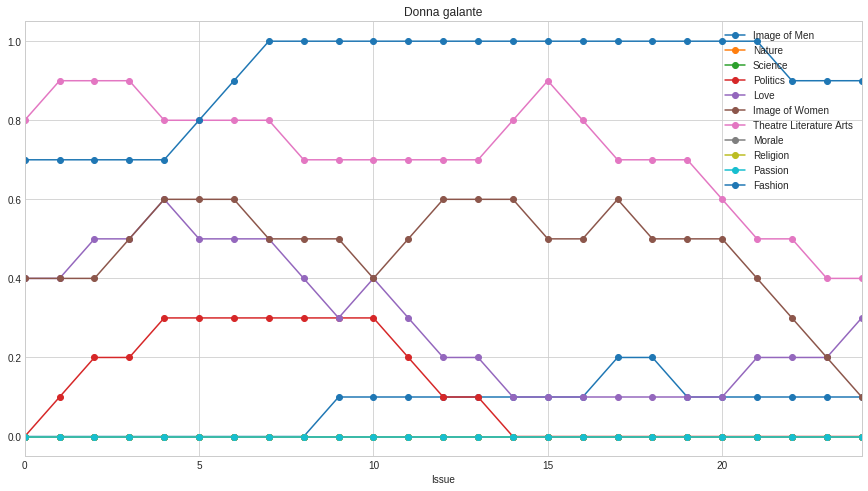

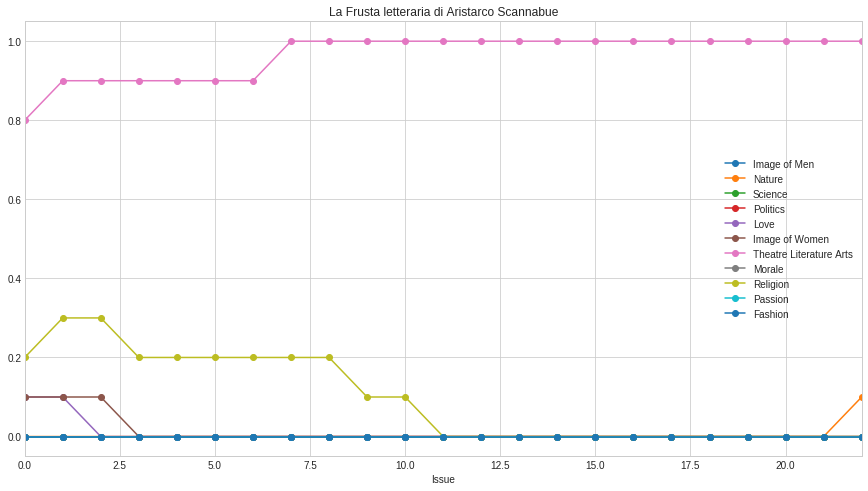

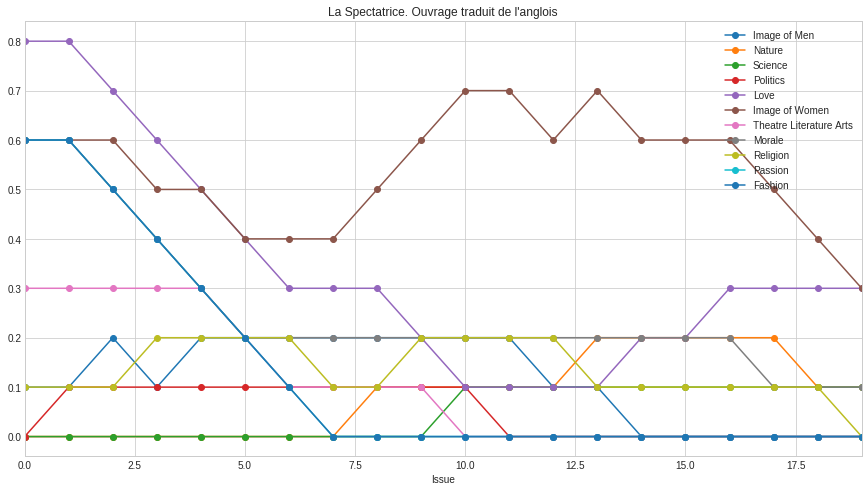

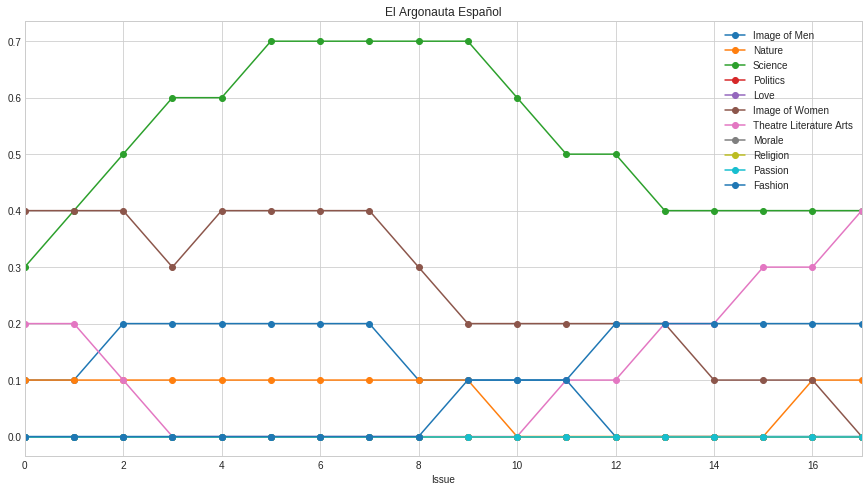

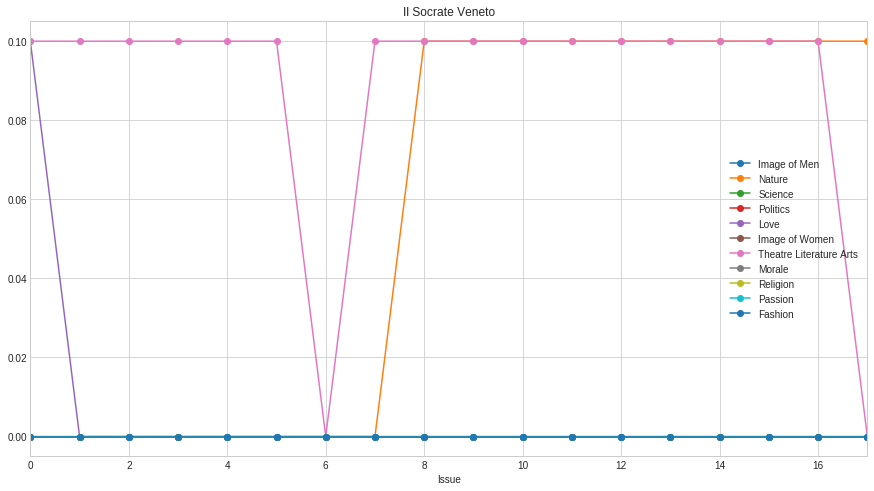

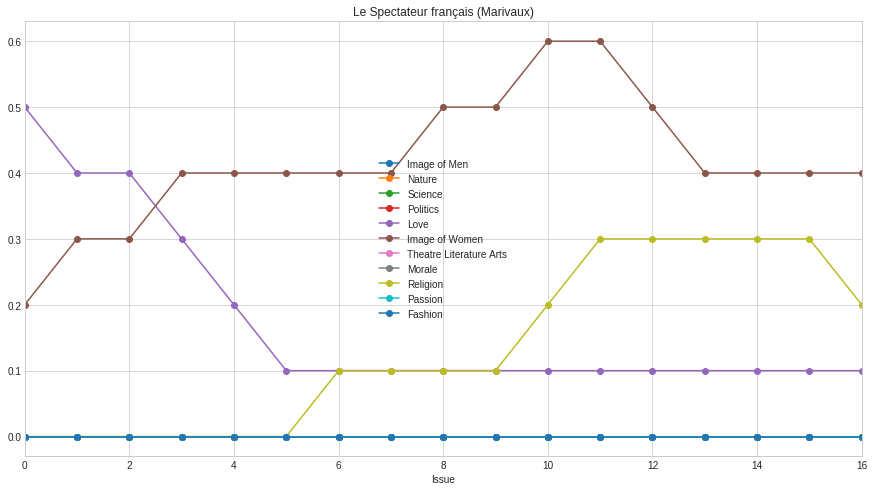

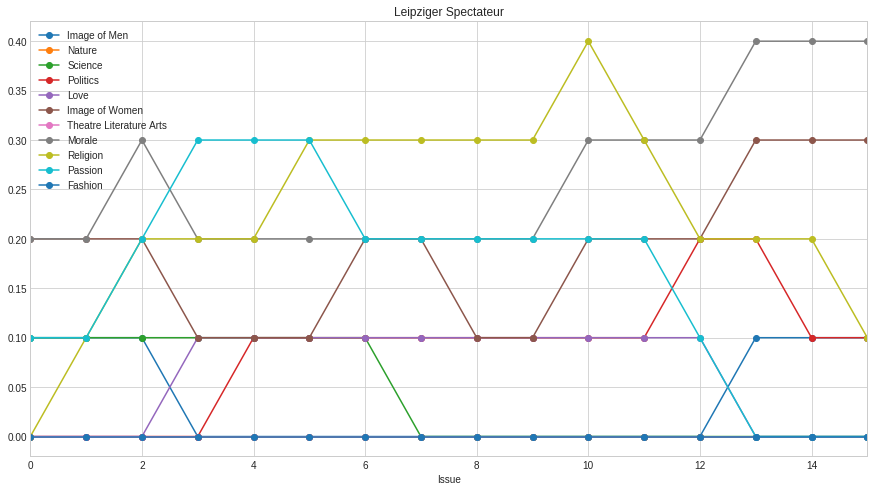

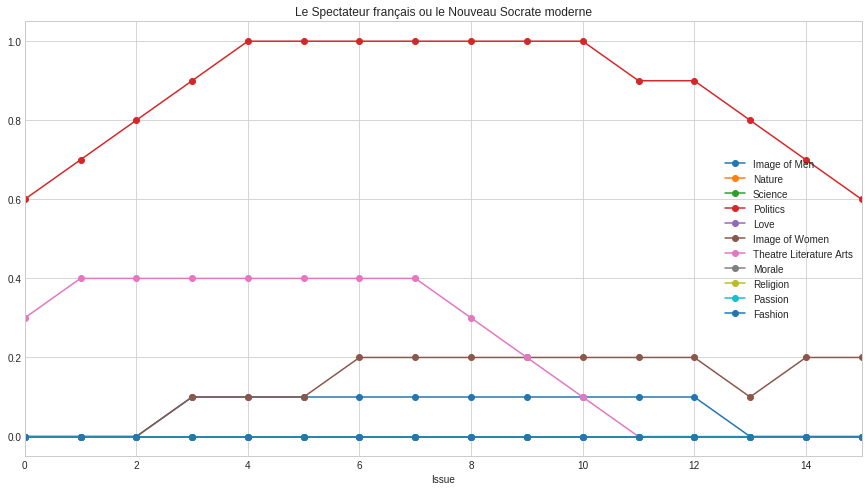

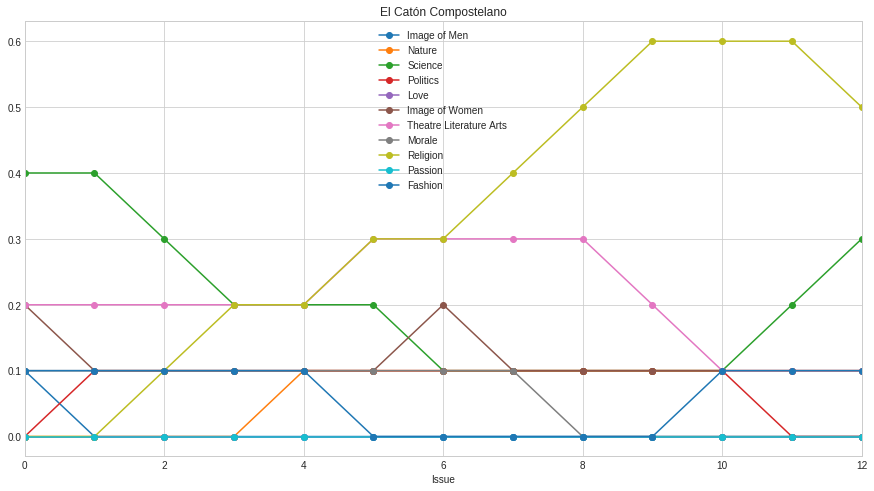

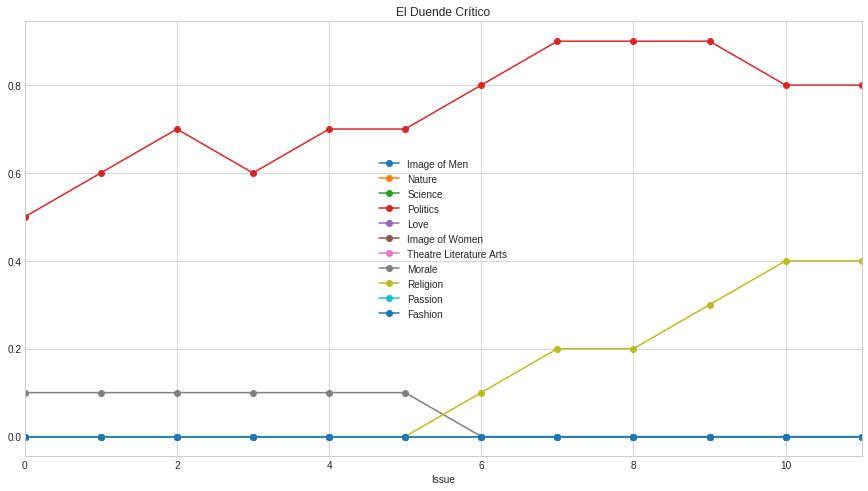

In [63]:
from numpy.lib.stride_tricks import as_strided as stride
def roll(df, w, **kwargs):
    v = df.values
    d0, d1 = v.shape
    s0, s1 = v.strides

    a = stride(v, (d0 - (w - 1), w, d1), (s0, s0, s1))

    rolled_df = pd.concat({
        row: pd.DataFrame(values, columns=df.columns)
        for row, values in zip(df.index, a)
    })

    return rolled_df.groupby(level=0, **kwargs)

#journal="La Gazzetta Veneta"
# journal="Lo Spettatore italiano"
# journal='La Bagatelle'
# journal = 'El Censor'
#journal='Leipziger Spectateur'
window_size=10

for ind in range(len(journal_count)):
    if journal_count.values[ind]>20:
        journal=journal_count.index[ind]

        topics_year_language=texts_changes.loc[texts_changes.journal_title==journal].drop('date',axis=1)

        ax = roll(topics_year_language.sort_values(by=['volume','issue']).reset_index()[relevant_topics], window_size).mean() \
            .plot(figsize=(15,8),marker='o',title=journal)
        ax.set_xlabel('Issue')

In [43]:
topics_language=texts_changes.groupby('journal_title').sum()
topics_language=topics_language.drop('date',axis=1)
topics_language=topics_language[(topics_language.T != 0).any()]
topics_language=topics_language.div(topics_language.sum(axis=1), axis=0)
topics_language

Manners and Customs  \
journal_title                                                             
Der Bürger                                                     0.000000   
Der Zuschauer                                                  1.000000   
Die Zuschauerin                                                0.000000   
Donna galante                                                  0.202703   
El Amigo y Corresponsal del Censor                             1.000000   
El Apologista Universal                                        0.066667   
El Argonauta Español                                           0.392857   
El Belianis literario                                          0.000000   
El Catón Compostelano                                          0.333333   
El Censor                                                      0.187919   
El Corresponsal del Apologista                                 0.000000   
El Corresponsal del Censor                                     0.211268   
El Curioso Entretenido                                         0.166667   
El Duende Crítico                                              0.129032   
El Duende de Madrid                                            0.375000   
El Duende especulativo sobre la vida civil                     0.315789   
El Escritor sin Titulo                                         0.000000   
El Filosofo à la Moda                                          0.111111   
El Juzgado Casero                                              0.500000   
El Murmurador imparcial                                        0.500000   
El Observador                                                  0.200000   
El Pensador                                                    0.230769   
El Regañón general                                             0.225806   
Gazzetta urbana veneta                                         0.079710   
Gli Osservatori veneti                                         0.105263   
Il Caffè                                                       0.190476   
Il Filosofo alla Moda                                          0.051680   
Il Socrate Veneto                                              0.055556   
La Bagatelle                                                   0.018293   
La Bigarure                                                    0.054455   
...                                                                 ...   
La Spectatrice danoise                                         0.214286   
La Spectatrice. Ouvrage traduit de l'anglois                   0.104478   
La Spettatrice                                                 0.000000   
Le Cabinet du Philosophe                                       0.000000   
Le Censeur ou Caractères des Mœurs de la Haye                  0.263158   
Le Mentor moderne                                              0.127273   
Le Misantrope                                                  0.006579   
Le Monde                                                       0.033333   
Le Monde comme il est (Bastide)                                0.000000   
Le Nouveau Spectateur (Bastide)                                0.008475   
Le Nouveau Spectateur français                                 0.000000   
Le Philosophe nouvelliste                                      0.077778   
Le Spectateur français (Marivaux)                              0.000000   
Le Spectateur français avant la révolution                     0.062500   
Le Spectateur français ou Journal des Mœurs                    0.171429   
Le Spectateur français ou le Nouveau Socrate mo...             0.032258   
Le Spectateur françois pendant le gouvernement ...             0.055556   
Le Spectateur inconnu                                          0.083333   
Le Spectateur moderne                                          0.000000   
Le Spectateur ou le Socrate moderne                            0.072093   
Le Spectateur suisse                                           0.000000   
Le

In [443]:
language_journal=texts_changes.pivot_table(values='date', index='journal_title',columns='language',aggfunc='count')
language_journal[language_journal > 0] = 1
language_journal = language_journal.fillna(0)
language_journal

language                                            English  French  German  \
journal_title                                                                 
Der Bürger                                              0.0     0.0     1.0   
Der Zuschauer                                           0.0     0.0     1.0   
Die Zuschauerin                                         0.0     0.0     1.0   
Donna galante                                           0.0     0.0     0.0   
El Amigo y Corresponsal del Censor                      0.0     0.0     0.0   
El Apologista Universal                                 0.0     0.0     0.0   
El Argonauta Español                                    0.0     0.0     0.0   
El Belianis literario                                   0.0     0.0     0.0   
El Catón Compostelano                                   0.0     0.0     0.0   
El Censor                                               0.0     0.0     0.0   
El Corresponsal del Apologista                          0.0     0.0     0.0   
El Corresponsal del Censor                              0.0     0.0     0.0   
El Curioso Entretenido                                  0.0     0.0     0.0   
El Duende Crítico                                       0.0     0.0     0.0   
El Duende de Madrid                                     0.0     0.0     0.0   
El Duende especulativo sobre la vida civil              0.0     0.0     0.0   
El Escritor sin Titulo                                  0.0     0.0     0.0   
El Filosofo à la Moda                                   0.0     0.0     0.0   
El Juzgado Casero                                       0.0     0.0     0.0   
El Murmurador imparcial                                 0.0     0.0     0.0   
El Observador                                           0.0     0.0     0.0   
El Pensador                                             0.0     0.0     0.0   
El Regañón general                                      0.0     0.0     0.0   
El Teniente del Apologista                              0.0     0.0     0.0   
Gazzetta urbana veneta                                  0.0     0.0     0.0   
Gli Osservatori veneti                                  0.0     0.0     0.0   
Il Caffè                                                0.0     0.0     0.0   
Il Filosofo alla Moda                                   0.0     0.0     0.0   
Il Socrate Veneto                                       0.0     0.0     0.0   
La Bagatelle                                            0.0     1.0     0.0   
...                                                     ...     ...     ...   
La Spectatrice danoise                                  0.0     1.0     0.0   
La Spectatrice. Ouvrage traduit de l'anglois            0.0     1.0     0.0   
La Spettatrice                                          0.0     0.0     0.0   
Le Cabinet du Philosophe                                0.0     0.0     0.0   
Le Censeur ou Caractères des Mœurs de la Haye           0.0     1.0     0.0   
Le Mentor moderne                                       0.0     1.0     0.0   
Le Misantrope                                           0.0     1.0     0.0   
Le Monde                                                0.0     1.0     0.0   
Le Monde comme il est (Bastide)                         0.0     1.0     0.0   
Le Nouveau Spectateur (Bastide)                         0.0     1.0     0.0   
Le Nouveau Spectateur français                          0.0     1.0     0.0   
Le Philosophe nouvelliste                               0.0     1.0     0.0   
Le Spectateur français (Marivaux)                       0.0     0.0     0.0   
Le Spectateur français avant la révolution              0.0     1.0     0.0   
Le Spectateur français ou Journal des Mœurs             0.0     1.0     0.0   
Le Spectateur français ou le Nouveau Socrate mo...      0.0     1.0     0.0   
Le Spectateur françois pendant le gouvernement ...      0.0     1.0     0.0   
Le Spectateur inconnu                             

In [422]:
from IB import *
ds = dataset(pxy=topics_language.values/np.sum(topics_language.values))
ds.clamped=True
m=model(ds=ds,alpha=0,beta=25,Tmax=3)
m.fit(keep_steps=True)

step 1: I(X,T) = 1.585, H(T) = 1.585, T = 3, H(X) = 6.022, I(Y,T) = 0.051, I(X,Y) = 0.851, L = 0.298
******************** Beginning IB fit with the following parameters ********************
alpha = 0.00, beta = 25.0, Tmax = 3, p0 = None, wav = None, geo = False,
ctol_abs = 1e-04, ctol_rel = 0e+00, cthresh = 1, ptol = 1e-08, zeroLtol = 0e+00
smoothing_type = None, smoothing_center = None, s = None, d = None
****************************************************************************************
step 2: I(X,T) = 1.578, H(T) = 1.578, T = 3, H(X) = 6.022, I(Y,T) = 0.177, I(X,Y) = 0.851, L = -2.840
step 3: I(X,T) = 1.568, H(T) = 1.568, T = 3, H(X) = 6.022, I(Y,T) = 0.201, I(X,Y) = 0.851, L = -3.446
step 4: I(X,T) = 1.568, H(T) = 1.568, T = 3, H(X) = 6.022, I(Y,T) = 0.204, I(X,Y) = 0.851, L = -3.523
step 5: I(X,T) = 1.567, H(T) = 1.567, T = 3, H(X) = 6.022, I(Y,T) = 0.205, I(X,Y) = 0.851, L = -3.548
step 6: I(X,T) = 1.559, H(T) = 1.559, T = 3, H(X) = 6.022, I(Y,T) = 0.207, I(X,Y) = 0.851, L 

In [423]:
import os.path
fname='results_' + str(m.Tmax) + '.obj'
if not os.path.isfile(fname):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Stored first solution')
file_result = open(fname, 'rb')
old_m=pickle.load(file_result)
if (old_m.Tmax == m.Tmax) and (m.iyt>old_m.iyt):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Better solution found')

Better solution found


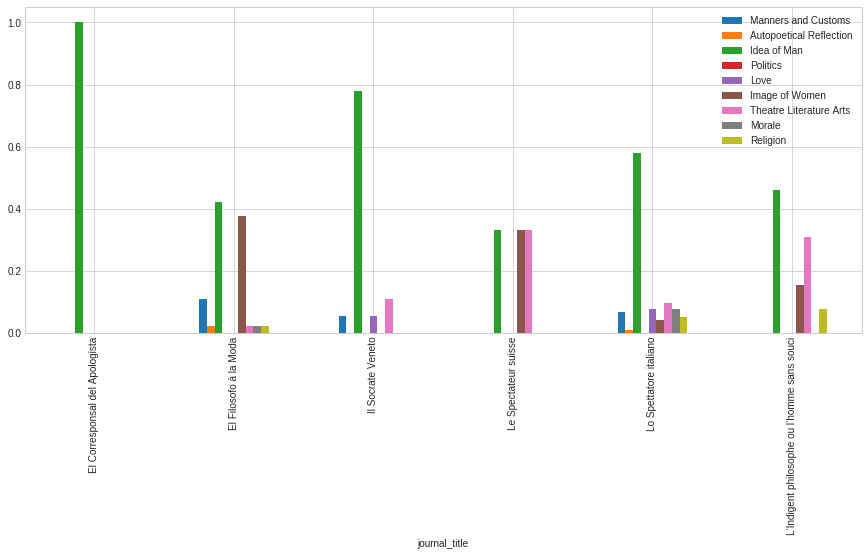

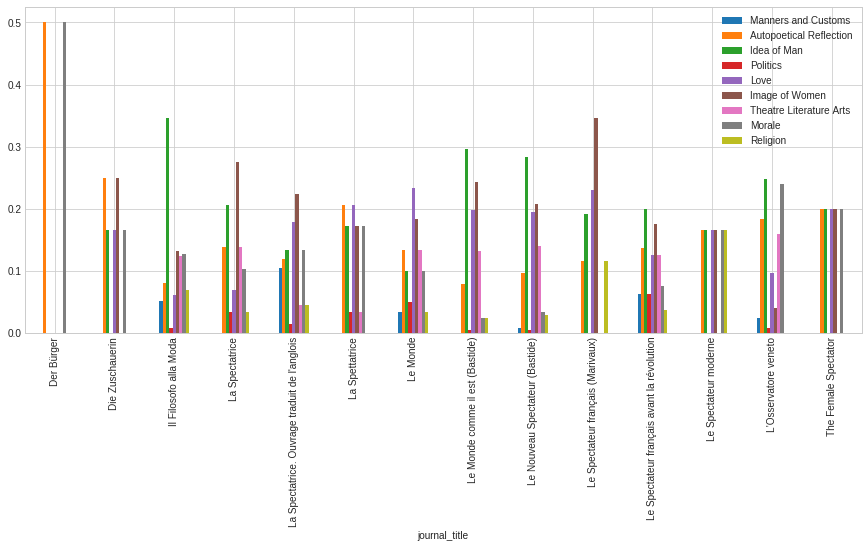

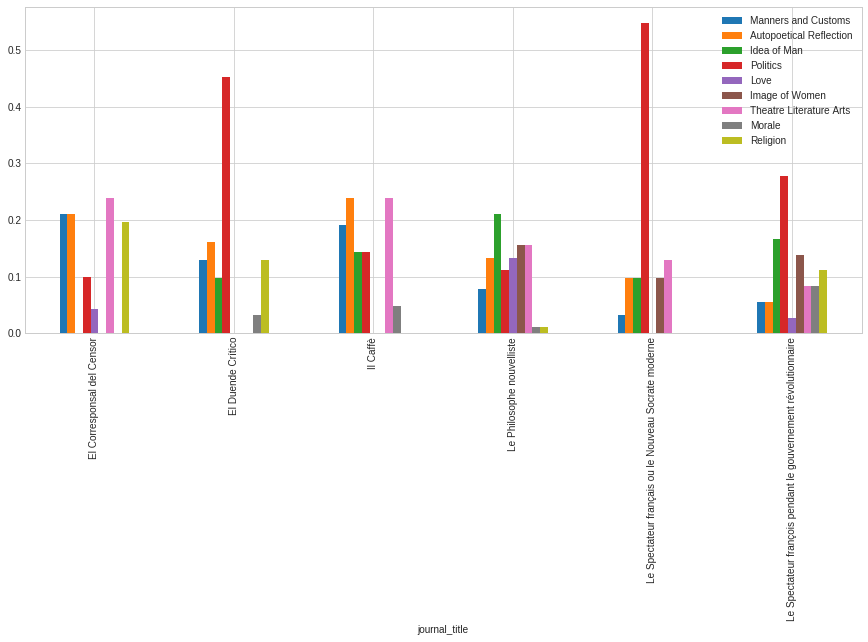

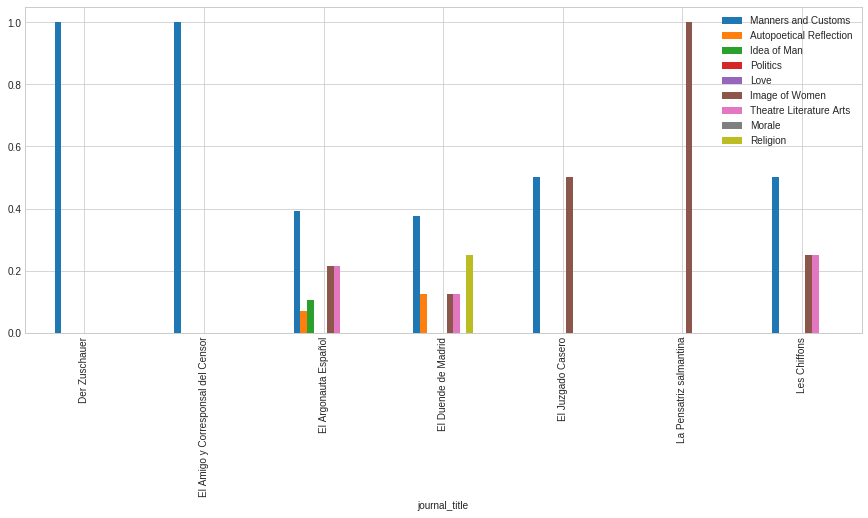

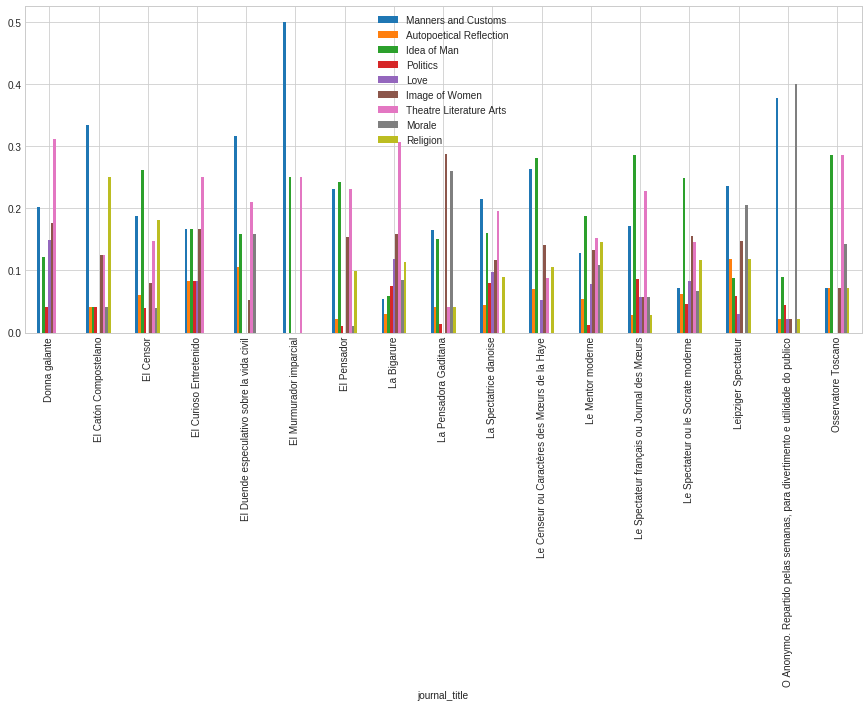

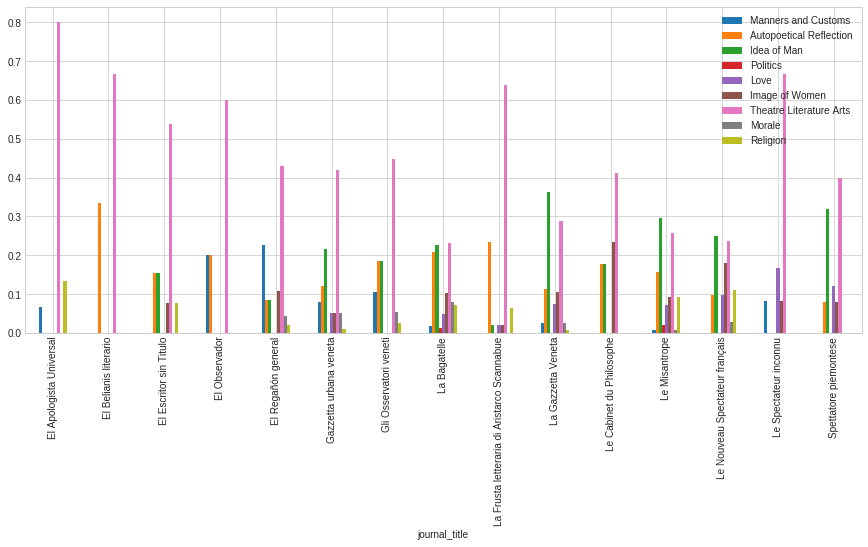

In [447]:
Number_of_Clusters=6

file_result = open('results_' + str(Number_of_Clusters) + '.obj', 'rb')
best_m=pickle.load(file_result)

for Cluster in range(Number_of_Clusters):
    topics_language.loc[best_m.qt_x[Cluster]==1,:].plot(figsize=(15,6),kind='bar')

/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/bgeiger/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using

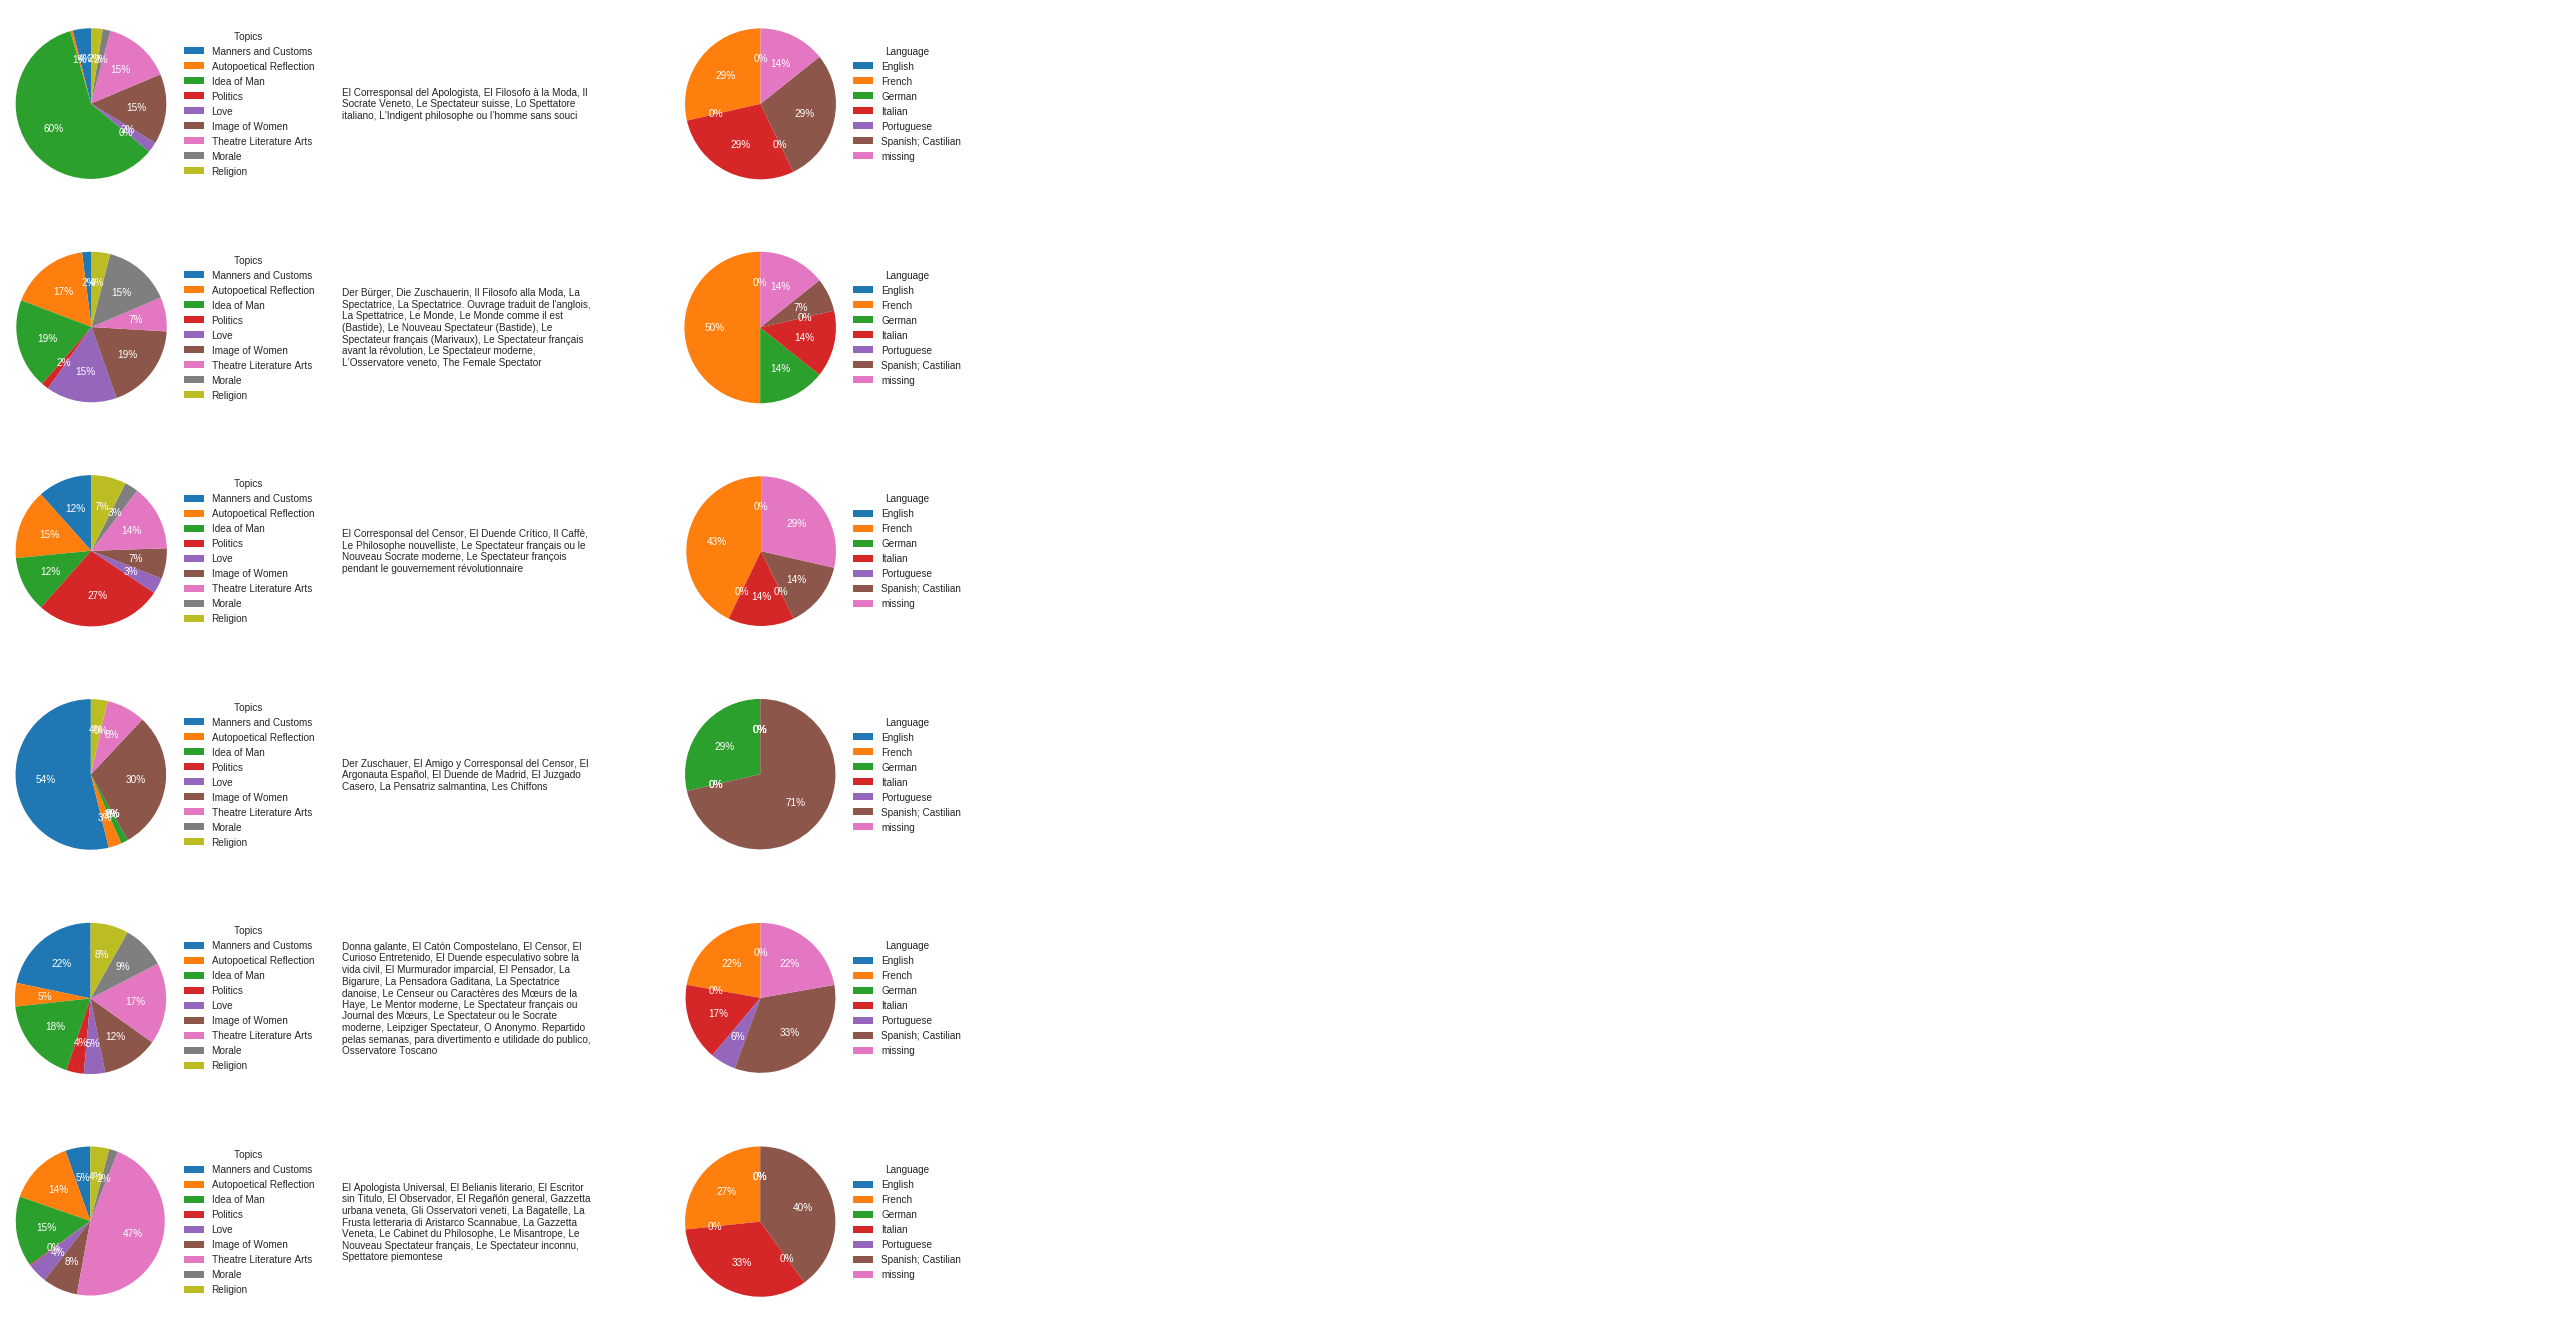

In [456]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(Number_of_Clusters, 3, figsize=(15,4*Number_of_Clusters))
f.subplots_adjust(wspace = 1) 
for Cluster in range(Number_of_Clusters):
    wedges, texts, autotexts = axs[Cluster][0].pie(topics_language.loc[best_m.qt_x[Cluster]==1,:].mean(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][0].legend(wedges, topics_language.columns,title="Topics",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][0].axis('equal')
    axs[Cluster][1].axis([0, 1, 0, 1])
    axs[Cluster][1].axis('off')
    txt=axs[Cluster][1].text(0, 0.5, ', '.join(topics_language.index[best_m.qt_x[Cluster]==1].values), ha='left',va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 250.
    wedges, texts, autotexts = axs[Cluster][2].pie(language_journal.loc[best_m.qt_x[Cluster]==1,:].sum(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][2].legend(wedges, language_journal.columns,title="Language",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][2].axis('equal')
    f.show()
    
    